# Wizualizacja COVID-19
Projekt odnosi się do aktualnego wydarzenia - pandemii COVID-19. Zakłada on odczyt danych z pliku w formacie csv, uporządkowanie ich oraz przeprowadzenie odpowiednich analiz, w celu uzyskania wykresów i wniosków. 

Wykonawcy:
1. Wojciech Strycharczyk, 255713
2. Kacper Równicki, 255949

Trzy najważniejsze aspekty projektu:
1. Użycie biblioteki `DataFrames`,
2. Uporządkowanie, analiza i wizualizacja danych oraz dyskusja wyników,
3. Prezentacja projektu w skoroszycie Jupytera.

## 0. Wprowadzenie
Dane pochodzą ze strony https://ourworldindata.org/coronavirus-data.

In [1]:
#Instalacja kernela, który nie pokazuje ostrzeżeń.
using IJulia
IJulia.installkernel("Julia nodeps", "--depwarn=no")

┌ Info: Installing Julia nodeps kernelspec in /Users/Kacper/Library/Jupyter/kernels/julia-nodeps-1.3
└ @ IJulia /Users/Kacper/.julia/packages/IJulia/yLI42/deps/kspec.jl:78


"/Users/Kacper/Library/Jupyter/kernels/julia-nodeps-1.3"

Zacznijmy od załadowania odpowiednich bibliotek.

In [51]:
using DataFrames
using CSV
using Plots
import StatsPlots.groupedbar
using Dates

pyplot()

Plots.PyPlotBackend()

Możemy rozpocząć pracę. Rozpoczynamy od odczytania `DataFrame`, oraz uzyskania podstawowych informacji o naszych danych.

In [3]:
covid = DataFrame(CSV.File("covid-data.csv")); first(covid, 6)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths
,String?,String,Dates.D…,Int64,Int64,Int64,Int64
1,ABW,Aruba,2020-03-13,2,2,0,0
2,ABW,Aruba,2020-03-20,4,2,0,0
3,ABW,Aruba,2020-03-24,12,8,0,0
4,ABW,Aruba,2020-03-25,17,5,0,0
5,ABW,Aruba,2020-03-26,19,2,0,0
6,ABW,Aruba,2020-03-27,28,9,0,0


Przyjrzyjmy się wszystkim kolumnom oraz ich jednostkom.

In [4]:
for name in names(covid)
    println(name)
end

iso_code
location
date
total_cases
new_cases
total_deaths
new_deaths
total_cases_per_million
new_cases_per_million
total_deaths_per_million
new_deaths_per_million
total_tests
new_tests
total_tests_per_thousand
new_tests_per_thousand
new_tests_smoothed
new_tests_smoothed_per_thousand
tests_units
stringency_index
population
population_density
median_age
aged_65_older
aged_70_older
gdp_per_capita
extreme_poverty
cvd_death_rate
diabetes_prevalence
female_smokers
male_smokers
handwashing_facilities
hospital_beds_per_100k


Zaletą zaimportowanego pliku `.csv` jest dostęp do bardzo specyficznych danych każdego kraju, dzięki czemu możemy poruszyć kilka ciekawych kwestii w tym projekcie.

## 1. Początek

### Wybuch epidemii w Chinach
Epidemia koronawirusa rozpoczęła się na przełomie roku 2019 i 2020. To wtedy, z Chin, zaczynały napływac pierwsze informacje o nowej, nieznanej chorobie. Zobaczmy jak szybko rosła liczba zakażonych COVID-19. 

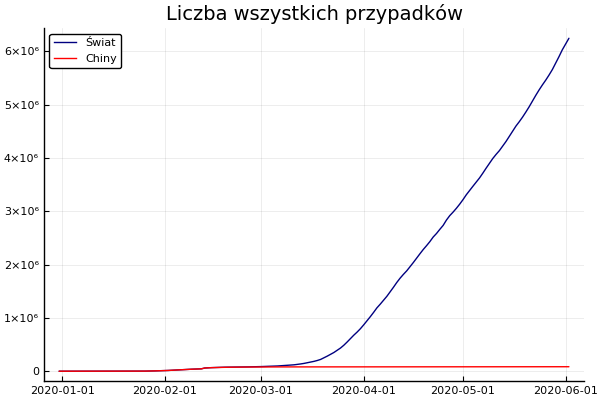

In [5]:
worldwide = covid[covid[:location] .== "World", :]
china = covid[covid[:location] .== "China", :]

plot(worldwide[:date], worldwide[:total_cases], label = "Świat",
                                                title = "Liczba wszystkich przypadków",
                                                color = :navy)

plot!(china[:date], china[:total_cases], label="Chiny", color = :red)

Możemy zauważyć, że do początku marca problem koronawirusa dotyczył niemal tylko i wyłącznie Chin. Dopiero potem liczba chorych zaczęła lawinowo rosnąć na całym świecie. Skalę zjawiska dobrze pokazuje także wykres o **skali logarytmicznej**.

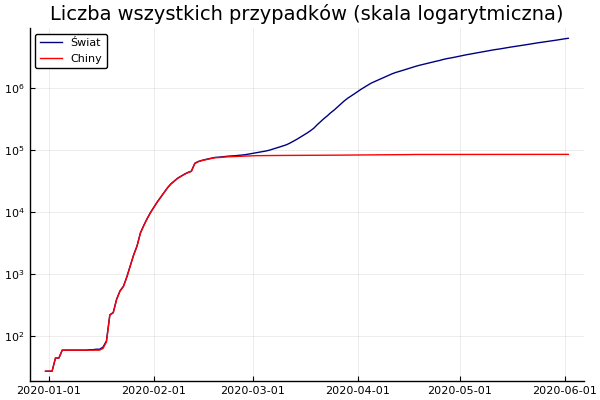

In [6]:
plot(worldwide[:date], worldwide[:total_cases], label = "Świat",
                                                title = "Liczba wszystkich przypadków (skala logarytmiczna)",
                                                color = :navy,
                                                yaxis = :log)

plot!(china[:date], china[:total_cases], label="Chiny",
                                                color = :red,
                                                yaxis = :log)

Można powiedzieć, że epidemia w Chinach zakończyła się na początku marca. Widać to na wykresie słupkowym nowych przypadków. Uwagę przykłuwa aż 15000 przypadkó 13 lutego. Było to spowodowane zmianą sposobu klasyfikacji chorych - przed tym dniem za chorych uznawano wyłącznie osoby hospitalizowane. Tamtego dnia zdecydowano się na dopisanie przypadków, które nie wymagały leczenia w szpitalu, a dały pozytywny wynik testu.


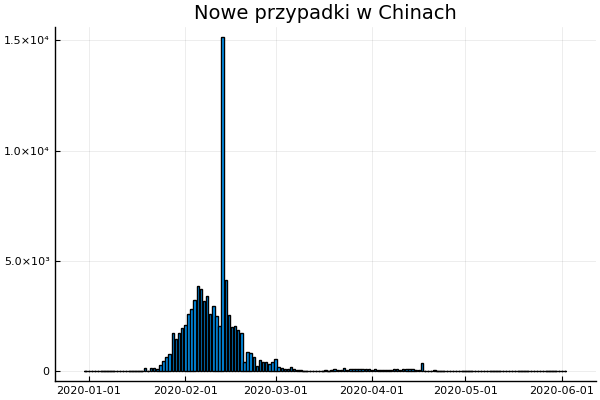

In [7]:
bar(china[:date], china[:new_cases], title="Nowe przypadki w Chinach", label=:none)

### Ogniska zachorowań
Spośród wszystkich krajów, możemy wyróżnić kilka, które mają najwięcej zachorowań.

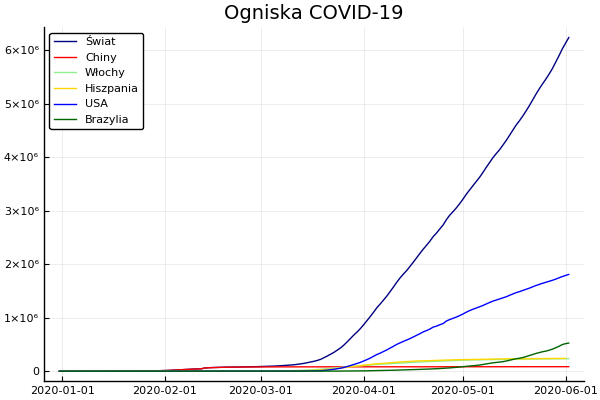

In [18]:
worldwide = covid[covid[:location] .== "World", :]
china = covid[covid[:location] .== "China", :]
italy = covid[covid[:location] .== "Italy", :]
spain = covid[covid[:location] .== "Spain", :]
usa = covid[covid[:location] .== "United States", :]
brazil = covid[covid[:location] .== "Brazil", :]

plot(worldwide[:date], worldwide[:total_cases], label = "Świat",
                                                title = "Ogniska COVID-19",
                                                color = :navy)

plot!(china[:date], china[:total_cases], label="Chiny", color = :red)
plot!(italy[:date], italy[:total_cases], label="Włochy", color = :lightgreen)
plot!(spain[:date], spain[:total_cases], label="Hiszpania", color = :gold)
plot!(usa[:date], usa[:total_cases], label="USA", color = :blue)
plot!(brazil[:date], brazil[:total_cases], label="Brazylia", color = :darkgreen)



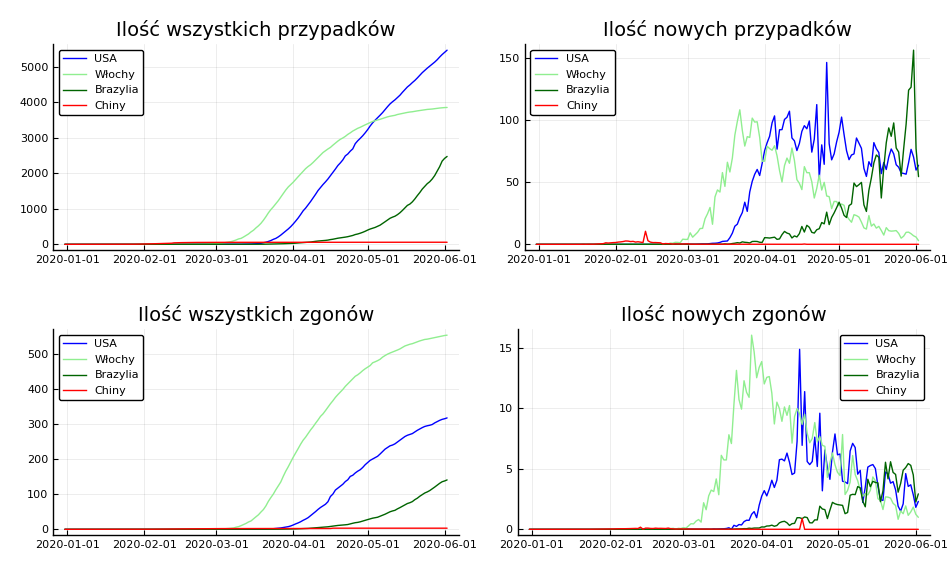

In [25]:
using Plots.PlotMeasures #Aby posługiwać się px jako jednostkami

p1 = plot(usa[:date], usa[:total_cases_per_million], label="USA", title="Ilość wszystkich przypadków", color= :blue)
plot!(italy[:date], italy[:total_cases_per_million], label="Włochy", color= :lightgreen)
plot!(brazil[:date], brazil[:total_cases_per_million], label="Brazylia", color= :darkgreen)
plot!(china[:date], china[:total_cases_per_million], label="Chiny", color= :red)

p2 = plot(usa[:date], usa[:new_cases_per_million], label="USA", title="Ilość nowych przypadków", color= :blue)
plot!(italy[:date], italy[:new_cases_per_million], label="Włochy", color= :lightgreen)
plot!(brazil[:date], brazil[:new_cases_per_million], label="Brazylia", color= :darkgreen)
plot!(china[:date], china[:new_cases_per_million], label="Chiny", color= :red)

p3 = plot(usa[:date], usa[:total_deaths_per_million], label="USA", title = "Ilość wszystkich zgonów", color= :blue)
plot!(italy[:date], italy[:total_deaths_per_million], label="Włochy", color= :lightgreen)
plot!(brazil[:date], brazil[:total_deaths_per_million], label="Brazylia", color= :darkgreen)
plot!(china[:date], china[:total_deaths_per_million], label="Chiny", color= :red)

p4 = plot(usa[:date], usa[:new_deaths_per_million], label="USA", title = "Ilość nowych zgonów", color= :blue)
plot!(italy[:date], italy[:new_deaths_per_million], label="Włochy", color= :lightgreen)
plot!(brazil[:date], brazil[:new_deaths_per_million], label="Brazylia", color= :darkgreen)
plot!(china[:date], china[:new_deaths_per_million], label="Chiny", color= :red)

plot(p1,p2, p3, p4, layout=4, size=size=(950,570), tight_layout=true, margin=20px)





### Powyższe wykresy prezentują odpowiednie wartości w przeliczeniu na milion mieszkańców.

##  2. Zależność między zaraźliwością Covid-19 i populacją kraju
 

### Zobaczmy, jak wygląda struktura wiekowa w powyższych krajach

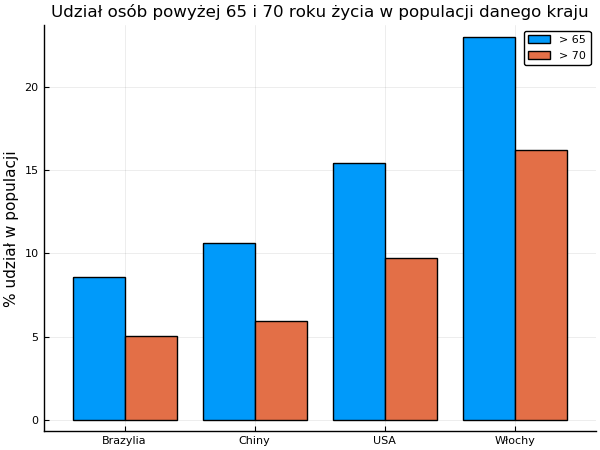

In [50]:
values = Array{Float64,1}()
for country in [usa, italy, brazil, china] #65_older_values
    push!(values, country[:aged_65_older][1])
end

for country in [usa, italy, brazil, china] #70_older_values
    push!(values, country[:aged_70_older][1])
end

mn = [2, 35, 30, 35, 27, 3, 32, 34]
sx = repeat(["> 65", "> 70"], inner = 4)
std = [2, 3, 4, 1, 2, 3, 5, 2, 3, 3]
nam = repeat(["USA", "Włochy", "Brazylia", "Chiny"], outer=2)

groupedbar(nam, values, group = sx, ylabel = "% udział w populacji", 
        title = "Udział osób powyżej 65 i 70 roku życia w populacji danego kraju", size=(600,450), titlefont = font(12))

### Przypadek Włoch - czy wiek gra rolę?
Na początku epidemii, wielu z nas zadawało sobie pytanie dlaczego we Włoszech aż tak dynamicznie rosła liczba nowych zakażeń. Pojawiła się teza, że wpływ na to może mieć wiek Włochów, wszak to najstarsze społeczeństwo w Europie.

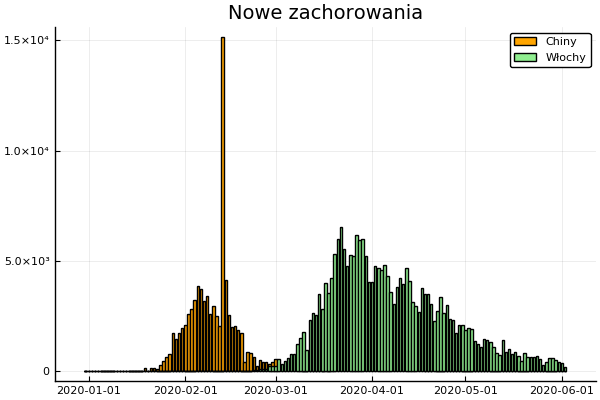

In [27]:
bar(china[:date], china[:new_cases], label="Chiny", color=:orange)
bar!(italy[:date], italy[:new_cases], title="Nowe zachorowania", label="Włochy", color=:lightgreen)

In [11]:
age = covid[:, [:location, :median_age, :aged_65_older, :aged_70_older]] |> unique |> dropmissing

median_sorted = sort!(age, :median_age, rev=true)

,location,median_age,aged_65_older,aged_70_older
,String,Float64,Float64,Float64
1,Japan,48.2,27.049,18.493
2,Italy,47.9,23.021,16.24
3,Germany,46.6,21.453,15.957
4,Portugal,46.2,21.502,14.924
5,Spain,45.5,19.436,13.799
6,Greece,45.3,20.396,14.524
7,Hong Kong,44.8,16.303,10.158
8,Bulgaria,44.7,20.801,13.272
9,Slovenia,44.5,19.062,12.93


Przyjrzyjmy się krajom, które miały najstarsze społeczeństwa.

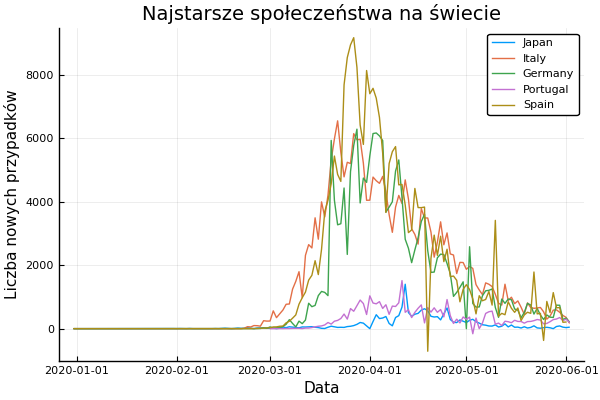

In [12]:
p = plot(title = "Najstarsze społeczeństwa na świecie", xlabel = "Data", ylabel = "Liczba nowych przypadków")
for country in ["Japan", "Italy", "Germany", "Portugal", "Spain"]
    df = covid[covid[:location] .== country, :]
    plot!(df[:date], df[:new_cases], label=country)
end

p

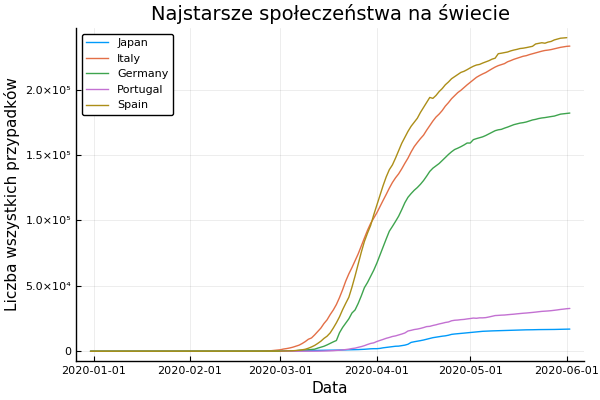

In [13]:
p = plot(title = "Najstarsze społeczeństwa na świecie", xlabel = "Data", ylabel = "Liczba wszystkich przypadków")
for country in ["Japan", "Italy", "Germany", "Portugal", "Spain"]
    df = covid[covid[:location] .== country, :]
    plot!(df[:date], df[:total_cases], label=country)
end

p 

Pomimo starego społeczeństwa, Portugalia i Japonia nie zanotowały tak drastycznych wzrosrów, jak Niemcy, Hiszpania czy Włochy. Zatem nie wydaje się, żeby to wiek był decydującym czynnikiem w tempie rozwoju epidemii.

Inną hipotezą był styl życia Włochów. Mieszkańcy krajów śródziemnomorskich znani są ze specyficznego, otwartego stylu życia. O ile nasze dane nie pozwalają sprawdzić, ilu Włochów chodzi do restauracji, możemy zbadać czy wpływ na to miało palenie papierosów.

## 3. Wpływ palenia papierosów

In [14]:
cigarettes = covid[:, [:location, :male_smokers, :female_smokers]] |> unique |> dropmissing

cigarettes_sorted = sort!(cigarettes, [:male_smokers, :female_smokers], rev=true) |> display

cigarettes[cigarettes[:location] .== ["Italy", ], :]

,location,male_smokers,female_smokers
,String,Float64,Float64
1,Timor,78.1,6.3
2,Indonesia,76.1,2.8
3,Tunisia,65.8,1.1
4,Russia,58.3,23.4
5,Georgia,55.5,5.3
6,Maldives,55.0,2.1
7,Lesotho,53.9,0.4
8,Cuba,53.3,17.1
9,Cyprus,52.7,19.6


,location,male_smokers,female_smokers
,String,Float64,Float64
1,Italy,27.8,19.8


W czołówce krajów palących najwięcej papierosów, prózno szukać jednak Włochów. Zajmują oni dość odległe miejsce w tej rywalizacji. Po przyjrzeniu się krzywym zachorowań, tylko w Rosji widać znaczącą liczbę chorych. Jako, że niektóre z tych państw są małe, użyjemy wskaźnika liczby przypadków na milion mieszkańców.

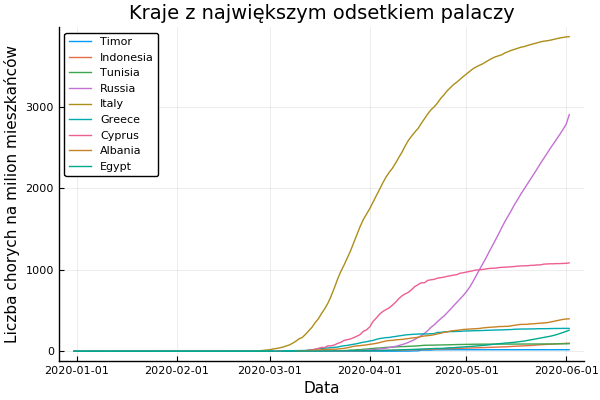

In [15]:
p = plot(title = "Kraje z największym odsetkiem palaczy", xlabel = "Data", ylabel = "Liczba chorych na milion mieszkańców")
for country in ["Timor", "Indonesia", "Tunisia", "Russia", "Italy", "Greece", "Cyprus", "Albania", "Egypt"]
    df = covid[covid[:location] .== country, :]
    plot!(df[:date], df[:total_cases_per_million], label=country)
end

p

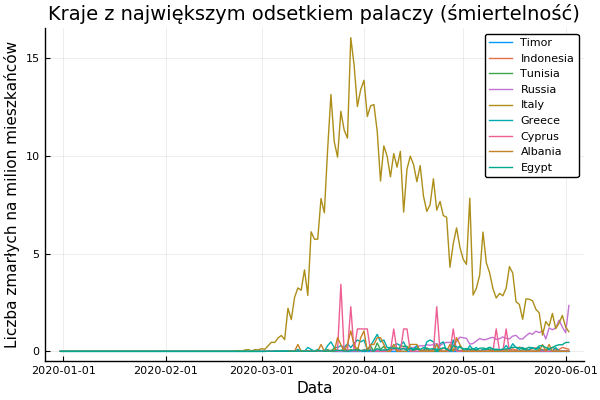

In [16]:
p = plot(title = "Kraje z największym odsetkiem palaczy (śmiertelność)", xlabel = "Data", ylabel = "Liczba zmarłych na milion mieszkańców")
for country in ["Timor", "Indonesia", "Tunisia", "Russia", "Italy", "Greece", "Cyprus", "Albania", "Egypt"]
    df = covid[covid[:location] .== country, :]
    plot!(df[:date], df[:new_deaths_per_million], label=country)
end

p

Ponownie nie widać zależności. Poza Rosją i Cyprem, pozostałe kraje nie notowały dużych przyrostów, choć epidamia startowała we wszystkich w podobnym czasie. We Włoszech, z kolei, chorych było znacznie więcej. Podobnie, ilość palaczy nie powoduje znacząco większej śmiertelności wśród chorych.

Wobec tego ciężko jednoznacznie stwierdzić, dlaczego to akurat we Włoszech sytuacja była aż tak poważna. Może wynikało to z postawy Włochów lub ze środków podjętych przez rząd, lecz nie można dowieść, że to wiek i palenie papierosów przyczyniło się do zwiększenia tempa COVID-19.

## 4. Sprawdźmy, czy liczba wykonywanych testów ma znaczenie
Na początku zobaczmy, które kraje wykonują najwięcej testów na 1000 mieszkańców (na dzień 28 maja)

In [52]:
tests_data = covid[covid[:date] .== Date(2020, 5, 28), :][:, [:location, :new_tests_per_thousand, :new_tests,  ]] |> unique |>dropmissing
tests_data = sort!(tests_data, :new_tests_per_thousand, rev=true); first(tests_data, 8)

,location,new_tests_per_thousand,new_tests
,String,Float64,Float64
1,Bahrain,3.965,6746.0
2,Lithuania,2.48,6750.0
3,Qatar,2.032,5853.0
4,Russia,1.955,285288.0
5,Luxembourg,1.518,950.0
6,Maldives,1.474,797.0
7,Kazakhstan,1.327,24921.0
8,Italy,1.255,75893.0


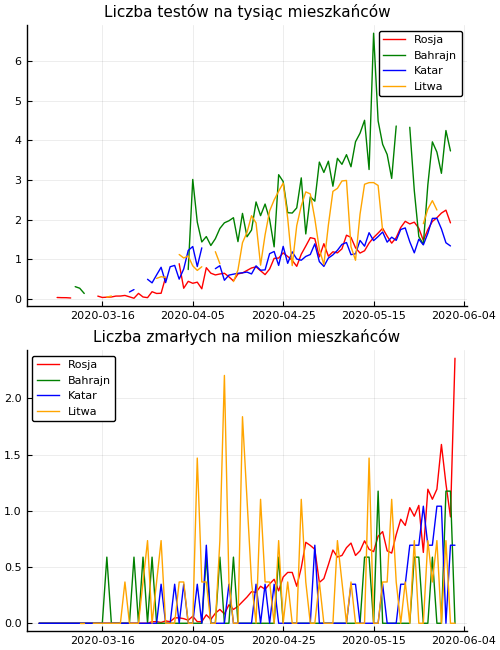

In [56]:
russia = covid[(covid[:location] .== "Russia") .& (covid[:date] .> Date(2020,3,1)) , :]
bahrain = covid[(covid[:location] .== "Bahrain") .& (covid[:date] .> Date(2020,3,1)) , :]
qatar = covid[(covid[:location] .== "Qatar") .& (covid[:date] .> Date(2020,3,1)) , :]
lithuania = covid[(covid[:location] .== "Lithuania") .& (covid[:date] .> Date(2020,3,1)) , :]

labels = ["Rosja", "Bahrajn", "Katar", "Litwa"]
countries = [russia, bahrain, qatar, lithuania]
colors = [:red, :green, :blue, :orange]

p1 = plot(title="Liczba testów na tysiąc mieszkańców", label="USA", titlefont=font(11))
p2 = plot(title="Liczba zmarłych na milion mieszkańców", label="USA", titlefont=font(11))

for country in zip(countries, labels, colors)
    df = country[1]
    plot!(p1, df[:date], df[:new_tests_per_thousand], label=country[2], color = country[3])
    plot!(p2, df[:date], df[:new_deaths_per_million], label=country[2], color = country[3])
end



plot(p1, p2, layout=(2,1), size=(500,650))



Jak widzimy na przykładzie Bahrajnu, mimo dużej liczby wykonywaych testów na 1000 mieszkańców, śmiertelność nie malała proporcjonalnie do tego czynnika oraz oscylowała na podobnym poziomie do innych krajów. Podobnie w Katarze.

Od początku marca śmiertelność w Rosji rosła, mimo zwiekszającej się liczby testów. 

W związku z tym, nie widać zależności między liczbą wykonywanych testów a liczbą zmarłych.



### Sprawdźmy, czy ilość nowych przypadków jest powiązana z liczbą wykonywanych testów
Ponownie przyjrzyjmy się krajom, które wykonują najwięcej testów w odniesieniu do populacji.

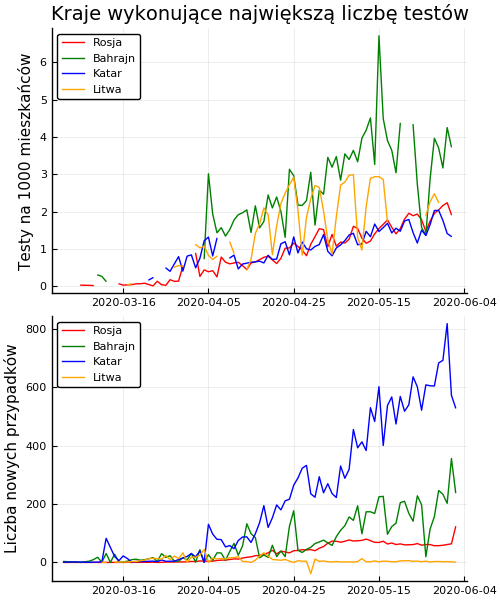

In [58]:
labels = ["Rosja", "Bahrajn", "Katar", "Litwa"]
countries = [russia, bahrain, qatar, lithuania]
colors = [:red, :green, :blue, :orange]

p1 = plot(ylabel="Testy na 1000 mieszkańców", title="Kraje wykonujące największą liczbę testów")
p2 = plot(ylabel="Liczba nowych przypadków")
for country in zip(countries,labels, colors)
    df = country[1]
    plot!(p1, df[:date], df[:new_tests_per_thousand], label=country[2], color = country[3])
    plot!(p2, df[:date], df[:new_cases_per_million], label=country[2], color = country[3])
end
plot(p1, p2, layout=(2,1), size=(500,600))

Jak widzimy na przykładzie Kataru, liczba nowo zdiagnozowanych na Covid-19 zwiększała się wraz ze wzrostem liczby testów. Podobną zależność widzimy w Bahrajnie oraz Rosji. 

W Litwie natomiast liczba nowo zdiagnozowanych na milion mieszkańców była bardzo niska, a czasami nawet ujemna! Możemy przypuszczać, że było tak za sprawą ilości przeprowadzanych testów, co skutkowało szybkim wykrywaniem zarażonych. 

Warto podkreślić, że pod koniec maja w Bahrajnie możemy zawuażyć duży spadek ilości badanych pod kątem Covid-19, zarówno jak i spadek liczby nowo zarażonych. Następnie, kiedy liczba testów wzrosła, liczba nowo zarażonych również.

Biorąc pod uwagę powyższe przypadki, możemy przypuszczać, że ilość zidentyfikowanych nowo zarażonych Covid-19 silnie zależy od liczby przeprowadzanych testów.

## 5. Wypływ liczby szpitalnych łóżek na śmiertelność Covid-19

Na początku sprawdźmy, które kraje mają najwięcej łóżek na 100 tysięcy mieszkańców.

In [59]:
beds_sorted = covid[[:location, :hospital_beds_per_100k]] |> unique |> dropmissing
beds_sorted = sort!(beds_sorted, :hospital_beds_per_100k, rev=true)
first(beds_sorted, 8)

,location,hospital_beds_per_100k
,String,Float64
1,Monaco,13.8
2,Japan,13.05
3,South Korea,12.27
4,Belarus,11.0
5,Ukraine,8.8
6,Russia,8.05
7,Germany,8.0
8,Bulgaria,7.454


#### Ponieważ Monaco liczy jedynie 39 tysięcy mieszkańców, dane mogą być niewiarygodne. Sprawdźmy zatem 5 kolejnych państw.

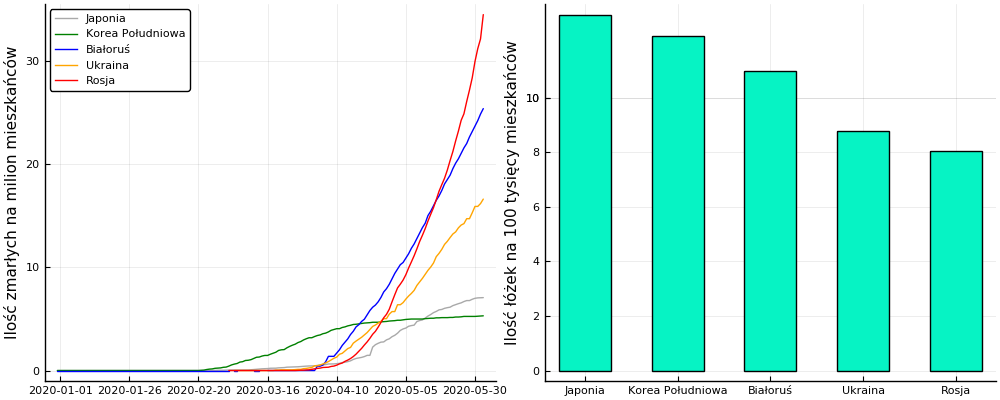

In [107]:
japan = covid[covid[:location] .== "Japan", :]
south_korea = covid[covid[:location] .== "South Korea", :]
belarus = covid[covid[:location] .== "Belarus", :]
ukraine = covid[covid[:location] .== "Ukraine", :]
germany = covid[covid[:location] .== "Germany", :]

p1 = plot(ylabel="Ilość zmarłych na milion mieszkańców")
p2 = bar(ylabel="Ilość łóżek na 100 tysięcy mieszkańców")

labels = ["Japonia", "Korea Południowa", "Białoruś", "Ukraina", "Rosja"]
countries = [japan, south_korea, belarus, ukraine, russia, germany]
colors = [:darkgray, :green, :blue, :orange, :red]


for country in zip(countries, labels, colors)
    df = country[1]
    plot!(p1, df[:date], df[:total_deaths_per_million], label=country[2], color = country[3])
    bar!(p2, [country[2]], [df[:hospital_beds_per_100k][1]], color = RGB(6/255,243/255,196/255), legend=false)
end

p = plot(p1,p2, size=(1000,400))


Na powyższych wykresach możemy zauważyć, że kraje z większą ilością łóżek lepiej radzą sobie z pandemią. (Liczba zmarłych na milion mieszkańców jest niższa) Jednak zależności te nie są wprost proporcjonalne, co widać na przykładzie Rosji oraz USA. Mimo że liczba łóżek prawie się nie różni, śmiertelność w USA jest znacznie wyższa. 

## 6. Stan gospodarki a pandemia
Zobaczmy czy ilość zarażeń lub liczba zgonów zależy od stanu gospodarki. W tym celu sprawdźmy jak z Covid-19 poradziły sobie kraje o najwyższym PKB per capita.

In [75]:
gdp_sorted = covid[[:location, :gdp_per_capita]] |> unique |> dropmissing
gdp_sorted = sort!(gdp_sorted, :gdp_per_capita, rev=true)
first(gdp_sorted, 8)

,location,gdp_per_capita
,String,Float64
1,Qatar,1.16936e5
2,Luxembourg,94278.0
3,Singapore,85535.4
4,Brunei,71809.3
5,Ireland,67335.3
6,United Arab Emirates,67293.5
7,Kuwait,65530.5
8,Norway,64800.1


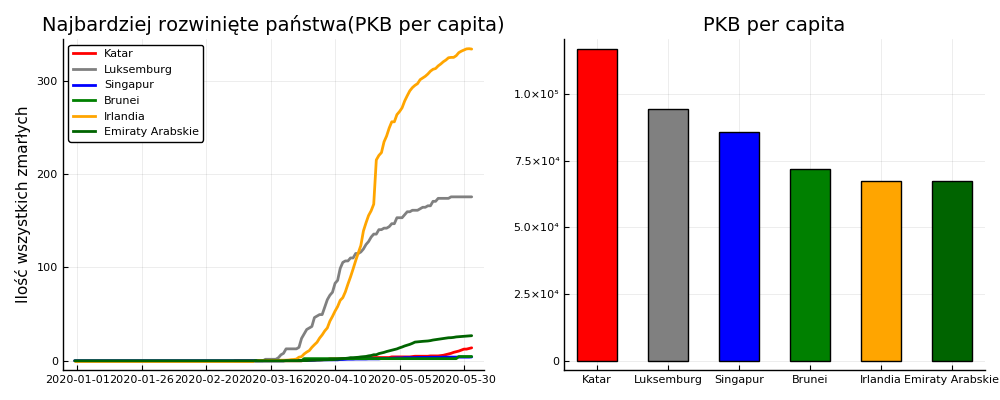

In [164]:
luxembourg = covid[covid[:location] .== "Luxembourg", :]
singapore = covid[covid[:location] .== "Singapore", :]
brunei = covid[covid[:location] .== "Brunei", :]
ireland = covid[covid[:location] .== "Ireland", :]
emirates = covid[covid[:location] .== "United Arab Emirates", :]

p1 = plot(title="Najbardziej rozwinięte państwa(PKB per capita)", ylabel="Ilość wszystkich zmarłych")
p2 = bar(title="PKB per capita", legend=false)


labels = ["Katar","Luksemburg", "Singapur", "Brunei", "Irlandia", "Emiraty Arabskie"]
countries = [qatar, luxembourg, singapore, brunei, ireland, emirates]
colors = [:red, :gray, :blue, :green, :orange, :darkgreen]

for country in zip(countries, labels, colors)
    df = country[1]
    plot!(p1,df[:date], df[:total_deaths_per_million], label=country[2], color = country[3], lw=2)
    bar!(p2, [country[2]], [df[:gdp_per_capita][1]], color= country[3])
end

plot(p1,p2, size=(1000, 400), margin=15px)

Zjednoczone Emiraty Arabskie, które według danych mają najmniejsze PKB per capita z powyższych państw, odnotowowało dużo mniejszą ilość zgonów na milion mieszkanców od Luksemburgu. W związku z tym, możemy przypuszczać, że liczba zmarłych rośnie proporcjonalnie do wielkości PKB na osobę. Jendak Katar nie potwierdza tej zależności - posiada największe PKB w przeliczeniu na mieszkańca oraz mniejszą ilość zmarłych od Emiaratów Arabskich. 

Natomiast Irlandia, której PKB per capita oscyluje na podobnym pozomie do Burnei oraz Emiaratów, zanotowała wieleokrotnie większy współczynnik zmarłych na milion mieszkańców.

W związku z powyższym, nie widzimy zależności między stanem gospodarki a ilością zmarłych.